In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

# Hands-on Activity 9.2: Sampling Estimates of the Probability Density via Histograms

## Objectives

- To estimate probability density via histrograms.

## Estimating the probability density function via histograms

As before take $X$ to be a random variable and $Y=g(X)$ a function of $X$.
We wish to approximate from samples the probability density $p(y)$ of $Y=g(X)$.
We start by spliting the domain of $y$ into $M$ small bins.
Assume that these bins have bounds $b_0, b_1, \dots, b_M$.
That is, the first bin is $[b_0,b_1]$, the second one is $[b_1,b_2]$, etc.
We will approximate $p(y)$ with a constant inside its bin.
That is, the approximation is:
$$
\hat{p}_M(y) = \sum_{j=1}^Mc_j 1_{[b_{j-1}, b_j]}(y),
$$
where the $c_j$'s are constants to be determined.
Each one of these constants is the probability that a sample of $Y$ falls inside the bin, i.e.,
$$
c_j = p(b_{j-1}\le Y \le b_j).
$$
Of course, this probability can be written as 
$$
c_j = F(b_j) - F(b_{j-1}),
$$
where $F(y)$ is the CDF of $Y$.
Therefore, we can approximate the constants using our estimate of the CDF.
In the notation of the previous section, we have that:
$$
\bar{c}_{j,N} := \bar{F}_N(b_j) - \bar{F}_N(b_{j-1}) \rightarrow c_j\;\text{a.s.}
$$
Of course, this is nothing more but:
$$
\bar{c}_{j,N} = \frac{\text{number of samples that fall in bin }[b_{j-1},b_j]}{N}
$$
Putting everything together, our estimate for the PDF $p(y)$ is:
$$
\hat{p}_{M,N}(y) = \sum_{j=1}^M\bar{c}_{j,N} 1_{[b_{j-1}, b_j]}(y),
$$
which does converge to $p(y)$ (in some sense) as both $N$ and $M$ go to infinity.

### Example: 1D CDF
We will continue using the 1D test function of Example 3.4 of Robert & Casella (2004).
Assume that $X\sim\mathcal{U}([0,1])$ and pick:
$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$

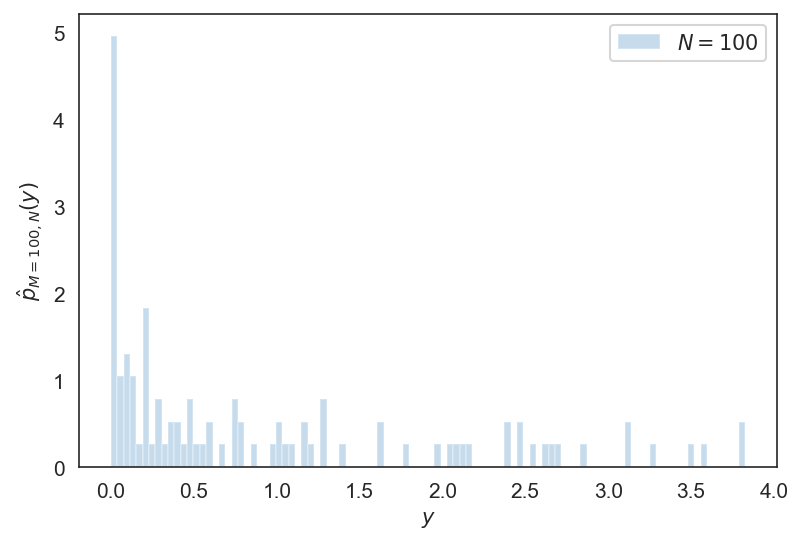

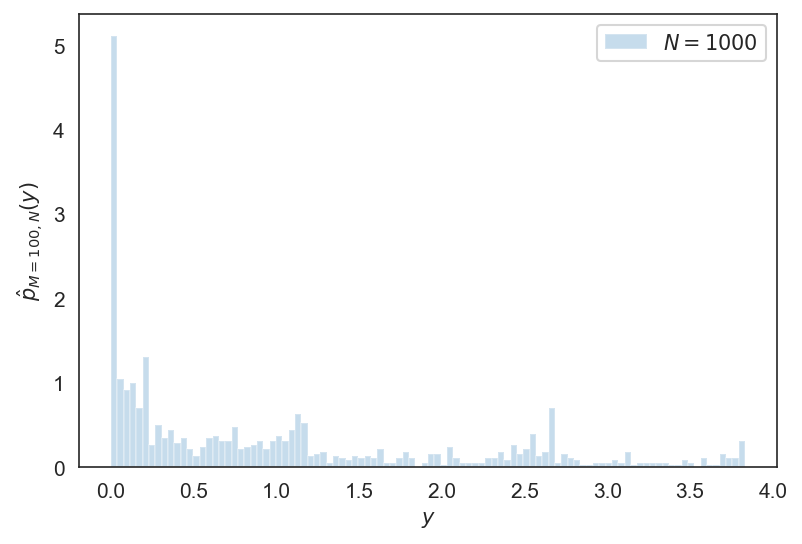

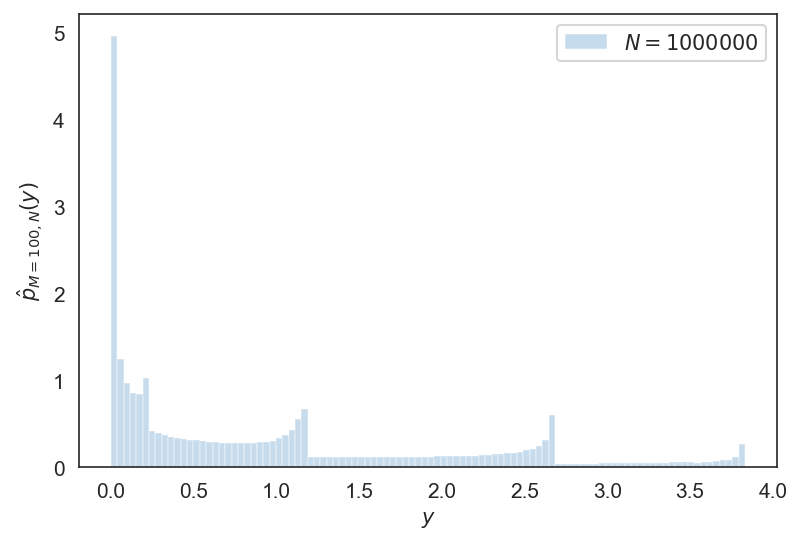

In [10]:
# define the function here:
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Again, we do not need to write any code for the histogram
# It's already implemented in several packages.
# We will use the matplotlib implementation

# Maximum number of samples to take
max_n = 1000000
# The number of bins
num_bins = 100
# Generate samples from X
x_samples = np.random.rand(max_n)
# Get the corresponding Y's
y_samples = g(x_samples)

# Make the plot
for N in [100, 1000, max_n]:
    fig, ax = plt.subplots(dpi=150)
    ax.hist(y_samples[:N], label='$N={0:d}$'.format(N), bins=num_bins,
        density=True, # This is required to divide by N
        alpha=0.25)
    ax.set_xlabel('$y$')
    ax.set_ylabel(r'$\hat{{p}}_{{M={0:d},N}}(y)$'.format(num_bins))
    plt.legend(loc='best');

## Questions 

+ Experiment with the number of bins $M$. Repeat the code above with $M=5, 10$ and $1000$. What do you observe? What happens when you have to few bins? What happens when you have to many bins? You should pick the number of bins and $N$ together. As a rule of thumb $N$ should be about ten times $M$. For a given choice of $M$, it is possible to pick how many $N$'s you need using what we will learn in lecture 10.